# Estimation of the magnetic amplitude from total-field anomaly data using equivalent layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import pandas as pd
import matplotlib as mpb
import scipy.stats as sp

from fatiando.vis import mpl
from fatiando.gridder import regular
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

# Input

### Importing TFA data

In [3]:
data = pd.read_csv('anitapolis_decimated_tfa_residual.txt', skipinitialspace=True, delim_whitespace=True)

In [4]:
mask = (data['Y'] <= 693000) & (data['Y'] >= 683000.) & (data['X'] <= 6926000.) & (data['X'] >= 6916000.)
dataset2 = data[mask]

In [5]:
mdt = dataset2['MDT'].get_values()
xt = dataset2['X'].get_values()
yt = dataset2['Y'].get_values()
zt = dataset2['GPSALT'].get_values()

In [6]:
mdt.size

1644

In [7]:
xp = data['X'].get_values()
yp = data['Y'].get_values()
zp = - data['GPSALT'].get_values()
dobs = data['mag_res1'].get_values()

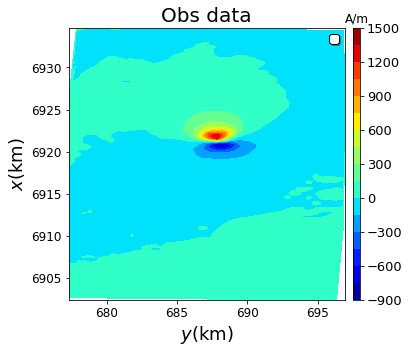

In [8]:
plt.figure(figsize=(6,5))
plt.title('Obs data', fontsize=20)
plt.tricontourf(yp, xp, dobs, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.show()

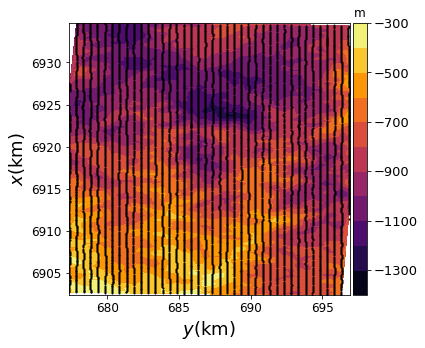

In [9]:
plt.figure(figsize=(6,5))
#plt.title('Residual', fontsize=20)
#plt.tricontour(inversion['y'], inversion['x'], inversion['residual'], 10, linewidths=0.5, colors='w')
plt.tricontourf(yp, xp, -data['MDT'], 10, cmap='inferno').ax.tick_params(labelsize=12)
plt.plot(yp, xp, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('m')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.show()
#img(filename=mypath+'complex_tfa_residual.png', width=1600, height=400)

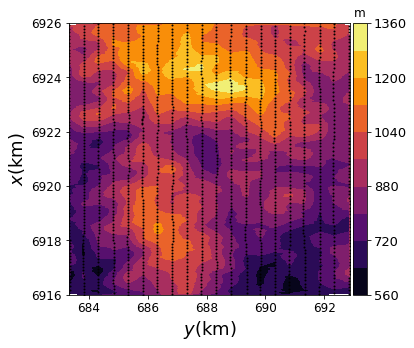

In [10]:
plt.figure(figsize=(6,5))
#plt.title('Residual', fontsize=20)
#plt.tricontour(inversion['y'], inversion['x'], inversion['residual'], 10, linewidths=0.5, colors='w')
plt.tricontourf(yt, xt, mdt, 10, cmap='inferno').ax.tick_params(labelsize=12)
plt.plot(yt, xt, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('m')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.show()
#img(filename=mypath+'complex_tfa_residual.png', width=1600, height=400)

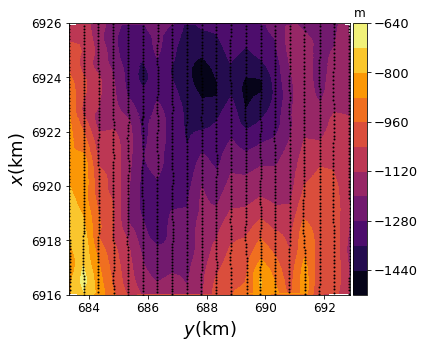

In [11]:
plt.figure(figsize=(6,5))
#plt.title('Residual', fontsize=20)
#plt.tricontour(inversion['y'], inversion['x'], inversion['residual'], 10, linewidths=0.5, colors='w')
plt.tricontourf(yt, xt, -dataset2['GPSALT'], 10, cmap='inferno').ax.tick_params(labelsize=12)
plt.plot(yt, xt, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('m')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.show()

In [12]:
# main field
inc = -37.05
dec = -18.17

#figura
incs = -37.05
decs = -18.17

In [13]:
h = np.zeros(xp.size) - 400.  # layer depth
A_tf = msf.sm_tf_sphere(xp, yp, zp, xp, yp, h, inc, dec, incs, decs)

In [14]:
I = np.identity(xp.size)
f0 = np.trace(np.dot(A_tf.T, A_tf))/xp.size
u0 = 0.00001

In [15]:
vp = np.linalg.solve(np.dot(A_tf.T,A_tf) + u0*f0*I,np.dot(A_tf.T,dobs))

In [16]:
tf = np.dot(A_tf,vp)

In [17]:
z_up = -2000.
area = [6916000., 6926000, 683000., 693000]
shape = (50, 50)
x, y, z = regular(area, shape, z=z_up)

In [18]:
A_up = msf.sm_tf_sphere(x, y, np.zeros(x.size)+ z_up, xp, yp, h, inc, dec, incs, decs)
upward_tfa = np.dot(A_up, vp)

In [19]:
mypath = 'eqlayer_rs/direction_inc%d_dec%d_h%dm' % (incs, decs, h[0])
if not os.path.isdir(mypath):
   os.makedirs(mypath)

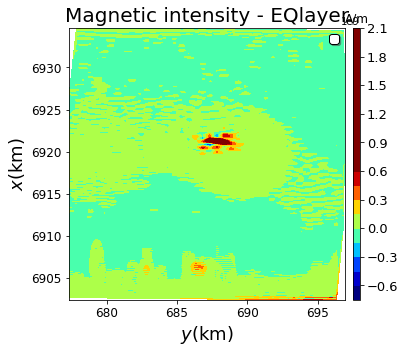

In [20]:
plt.figure(figsize=(6,5))
plt.title('Magnetic intensity - EQlayer', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(vp), vmax=-np.min(vp))
plt.tricontourf(yp, xp, vp, 20, cmap='jet', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('momentum_mag_intensity_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


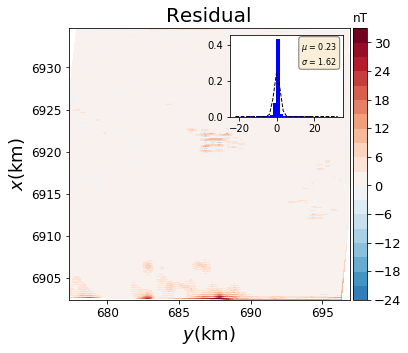

In [21]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(dobs-tf)*(-1), vmax=np.max(dobs-tf))
plt.tricontourf(yp, xp, dobs-tf, 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(dobs-tf)
std = np.std(dobs-tf)
nbins=30
n, bins, patches = plt.hist(dobs-tf,bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.63, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=8,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
plt.savefig(mypath+'diorama_tfa_residual.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'diorama_tfa_residual.png', width=1600, height=400)

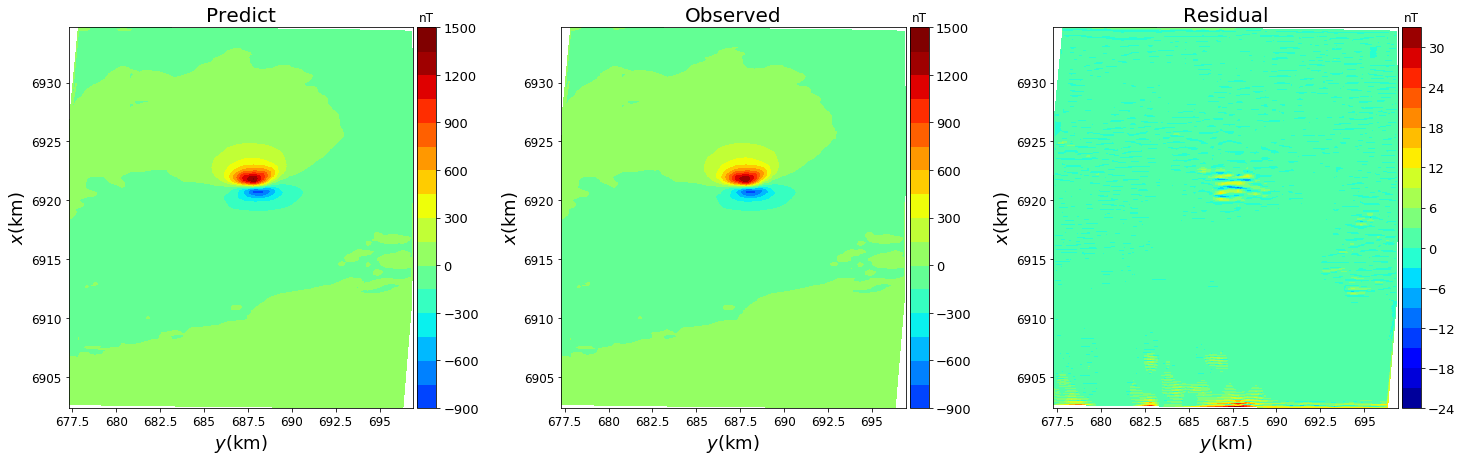

In [22]:
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, tf,20, cmap='jet', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(yp, xp, dobs, 20, cmap='jet', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
plt.tricontourf(yp, xp, dobs - tf, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'anitapolis_eqlayer_fit_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

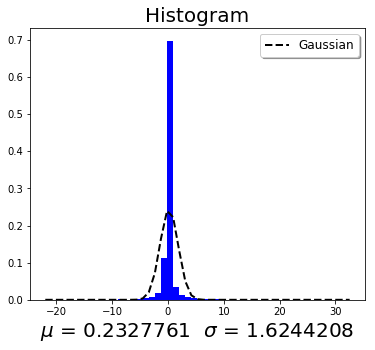

In [23]:
mean = np.mean(dobs - tf)
std = np.std(dobs - tf)
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
nbins=50
n, bins, patches = plt.hist(dobs - tf,bins=nbins, normed=True, color='blue')
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.xticks(np.linspace(-100*std, 100*std, 5),)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'anitapolis_tfa_hist_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

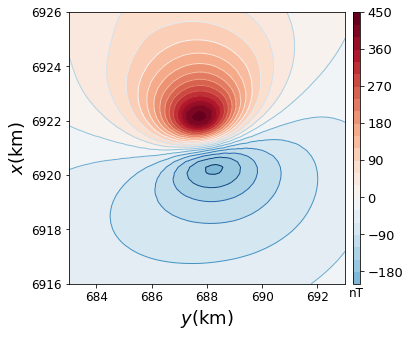

In [24]:
plt.figure(figsize=(6,5))
#plt.title('Upward TFA %dm' % (z_up), fontsize=20)
plt.tricontour(y, x, upward_tfa, 20, linewidths=1, cmap='RdBu_r')
plt.tricontourf(y, x, upward_tfa, 20, cmap='RdBu_r',
               vmin=-np.max(upward_tfa),
               vmax=np.max(upward_tfa)).ax.tick_params(labelsize=12)
#plt.plot(y, x, 'ko', markersize=.5)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT', pad=-285)
mpl.m2km()
plt.savefig(mypath+'anitapolis_tfa_upward_%dm_inc%d_dec%d.png' % (z_up, incs, decs), dpi=300)
plt.show()

In [25]:
A_bx = msf.sm_bx_sphere(x, y, z, xp, yp, h, incs, decs)

Bx = np.dot(A_bx,vp)

In [26]:
A_by = msf.sm_by_sphere(x, y, z, xp, yp, h, incs, decs)

By = np.dot(A_by,vp)

In [27]:
A_bz = msf.sm_bz_sphere(x, y, z, xp, yp, h, incs, decs)

Bz = np.dot(A_bz,vp)

In [28]:
mag_amp = np.sqrt(Bx**2 + By**2 + Bz**2)

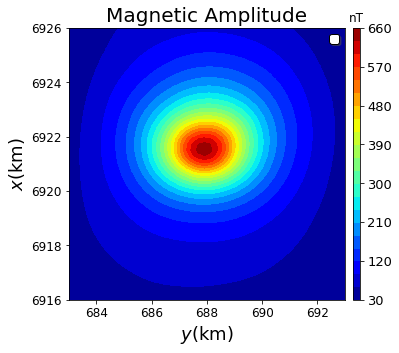

In [29]:
plt.figure(figsize=(6,5))
plt.title('Magnetic Amplitude', fontsize=20)
plt.tricontourf(y, x, mag_amp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'magnetic_amplitude_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

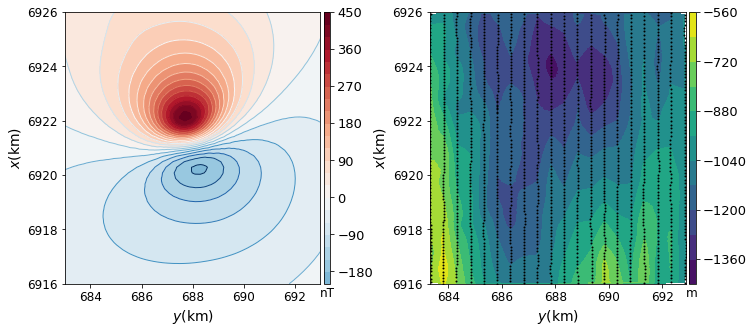

In [57]:
plt.figure(figsize=(12,5))

ax=plt.subplot(1,2,1)
plt.tricontour(y, x, upward_tfa, 20, linewidths=1, cmap='RdBu_r')
plt.tricontourf(y, x, upward_tfa, 20, cmap='RdBu_r',
               vmin=-np.max(upward_tfa),
               vmax=np.max(upward_tfa)).ax.tick_params(labelsize=12)
#plt.plot(y, x, 'ko', markersize=.5)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT', pad=-285)
mpl.m2km()

ax=plt.subplot(1,2,2)
plt.tricontourf(yt, xt, -(dataset2['GPSALT']-100.), 10, cmap='viridis').ax.tick_params(labelsize=12)
plt.plot(yt, xt, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-285)
clb.ax.tick_params(labelsize=13)
mpl.m2km()

plt.savefig(mypath+'data_alt.png', dpi=300, bbox_inches='tight')
plt.show()
#img(filename=mypath+'complex_tfa_residual.png', width=1600, height=400)

In [58]:
diorama_eqlayer = dict()

In [61]:
diorama_eqlayer['layer_depth'] = h[0]
diorama_eqlayer['regularization'] = u0
diorama_eqlayer['layer_parameters'] = vp
diorama_eqlayer['upward'] = upward_tfa
diorama_eqlayer['amf'] = mag_amp
diorama_eqlayer['x'] = x
diorama_eqlayer['y'] = y
diorama_eqlayer['xp'] = xp
diorama_eqlayer['yp'] = yp
diorama_eqlayer['zp'] = zp
diorama_eqlayer['xt'] = xt
diorama_eqlayer['yt'] = yt
diorama_eqlayer['zt'] = zt
diorama_eqlayer['z'] = np.zeros(x.size) + z_up
diorama_eqlayer['topography'] = -(dataset2['GPSALT']-100.)

In [62]:
file_name = mypath+'/eqlayer_depth%dm.pickle' % (h[0])
with open(file_name, 'w') as f:
    pickle.dump(diorama_eqlayer, f)